***
# <h1 align = 'center'>Data visualization & Sentiment analysis</h1> 
#### <center> Abderahmane BELLAMINE, Manal EL IDRISSI </center>
#### <center> Ecole Centrale Casablanca </center>
#### <center> January 2021 </center>
***

The purpose of this Lab is to visualize data previously collected from Twitter.

### Objectives of this jupyter notebooks file:
- Data Visualization
- Sentiment Analysis

#### Dependencies import
 

In [1]:
import pandas as pd
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

## Load Data

In [2]:
df_usa = pd.read_csv("../cleaned_data/usa_cleaned_tweets.csv")
df_uk = pd.read_csv("../cleaned_data/uk_cleaned_tweets.csv")
df_germany = pd.read_csv("../cleaned_data/germany_cleaned_tweets.csv")

## Sentiment Analysis

In [3]:
def new_dataframe(df):
    df['sentiment'] = df['cleaned_tweet'].apply(lambda tweet: TextBlob(tweet).sentiment)
    df['score'] = df['cleaned_tweet'].apply(lambda tweet: SentimentIntensityAnalyzer().polarity_scores(tweet))
    df['polarity'] = df['cleaned_tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
    df['subjectivity'] = df['cleaned_tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)
    return df

In [4]:
df_usa = new_dataframe(df_usa)
df_uk = new_dataframe(df_uk)
df_germany = new_dataframe(df_germany)

In [5]:
#Sentiment Analysis
def percentage(part_tweets,total_tweets):
    return 100 * float(part_tweets)/float(total_tweets)

def sentiment_analysis(df):
    
    positive = 0
    negative = 0
    neutral = 0
    polarity = 0
    neutral_list = []
    negative_list = []
    positive_list = []
    sentiments = list()
    cleaned_tweets = list(df['cleaned_tweet'])

    for tweet in cleaned_tweets:

        analysis = TextBlob(tweet)
        score = SentimentIntensityAnalyzer().polarity_scores(tweet)
        neg = score['neg']
        neu = score['neu']
        pos = score['pos']
        comp = score['compound']
        polarity += analysis.sentiment.polarity

        if neg > pos:
            negative_list.append(tweet)
            negative += 1
            sentiments.append("negative")
        elif pos > neg:
            positive_list.append(tweet)
            positive += 1
            sentiments.append("positive")
        elif pos == neg:
            neutral_list.append(tweet)
            neutral += 1
            sentiments.append("neutral")
            
    df["sentiment"] = sentiments
    
    return len(cleaned_tweets), positive, neutral, negative, polarity

In [6]:
def plot_pie_chart(df, country):
    
    no_tweets, no_positive_tweets, no_neutral_tweets, no_negative_tweets, polarity = sentiment_analysis(df)
    percentage_positive_tweets = percentage(no_positive_tweets, no_tweets)
    percentage_negative_tweets = percentage(no_negative_tweets, no_tweets)
    percentage_neutral_tweets = percentage(no_neutral_tweets, no_tweets)
    polarity = percentage(polarity, no_tweets)
    positive = format(percentage_positive_tweets, '.1f')
    negative = format(percentage_negative_tweets, '.1f')
    neutral = format(percentage_neutral_tweets, '.1f')
    #Creating PieCart
    labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
    sizes = [positive, neutral, negative]
    colors = ["yellowgreen", "blue", "red"]
    patches, texts = plt.pie(sizes,colors=colors, startangle=90)
    plt.style.use("default")
    plt.legend(labels)
    plt.title(f"Sentiment Analysis Result for {country} tweets")
    plt.axis("equal")
    plt.show()
    plt.savefig(f"../images/pie_chart_{country}.png")

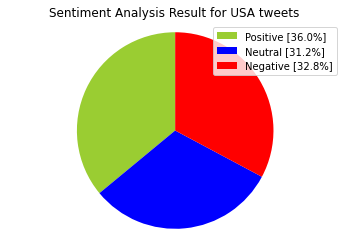

<Figure size 640x480 with 0 Axes>

In [7]:
plot_pie_chart(df_usa, "USA")

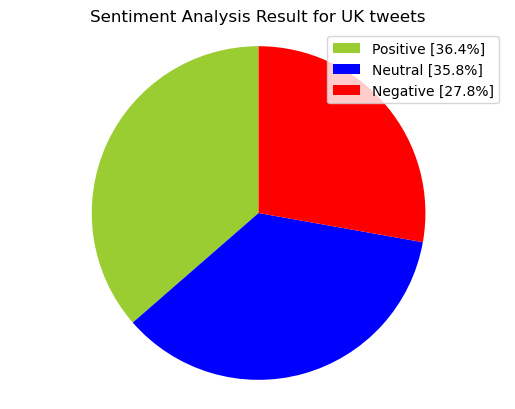

<Figure size 640x480 with 0 Axes>

In [8]:
plot_pie_chart(df_uk, "UK")

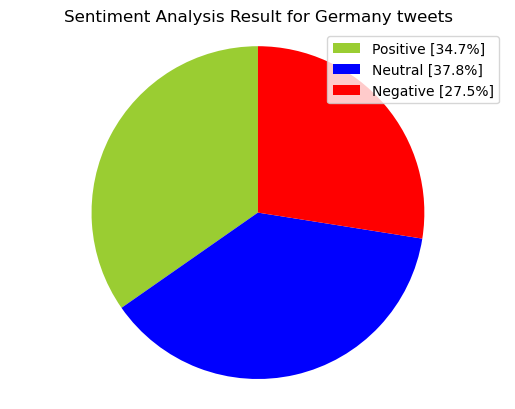

<Figure size 640x480 with 0 Axes>

In [9]:
plot_pie_chart(df_germany, "Germany")

In [10]:
def count_values_in_column(data,feature):
    sentiment_total=data.loc[:,feature].value_counts(dropna=False)
    percentage_sentiment=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([sentiment_total,percentage_sentiment],axis=1,keys=["Total","Percentage"])

In [11]:
# create data for Pie Chart
def plot_circle_chart(df, country):
    
    pichart = count_values_in_column(df,"sentiment")
    names= pichart.index
    size=pichart["Percentage"]

    # Create a circle for the center of the plot
    my_circle=plt.Circle( (0,0), 0.7, color="white")
    plt.pie(size, labels=names, colors=["green","blue","red"])
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(f"Sentiment Analysis Result for {country} tweets")
    plt.show()
    plt.savefig(f"../images/circle_chart_{country}.png")

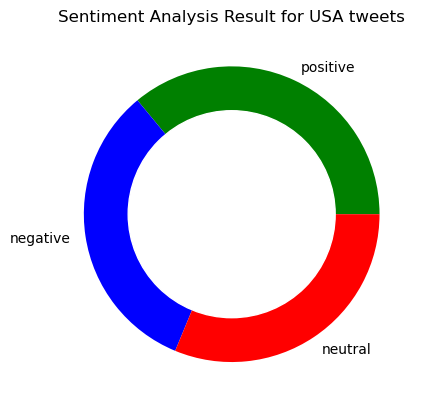

<Figure size 640x480 with 0 Axes>

In [12]:
plot_circle_chart(df_usa, "USA")

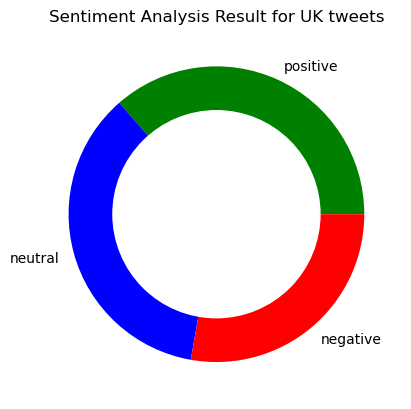

<Figure size 640x480 with 0 Axes>

In [13]:
plot_circle_chart(df_uk, "UK")

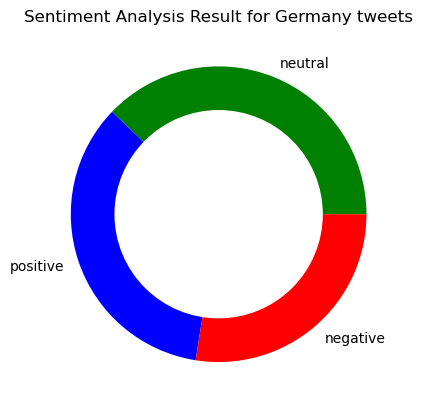

<Figure size 640x480 with 0 Axes>

In [14]:
plot_circle_chart(df_germany, "Germany")

In [15]:
#Function to Create Wordcloud
stopwords = set(STOPWORDS)

def create_wordcloud(text, country):
    path = f"../images/wordcloud_{country}.png"
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10)
    wordcloud.generate(str(text))
    wordcloud.to_file(path)
    print("Word Cloud Saved Successfully")
    display(Image.open(path))    


Word Cloud Saved Successfully


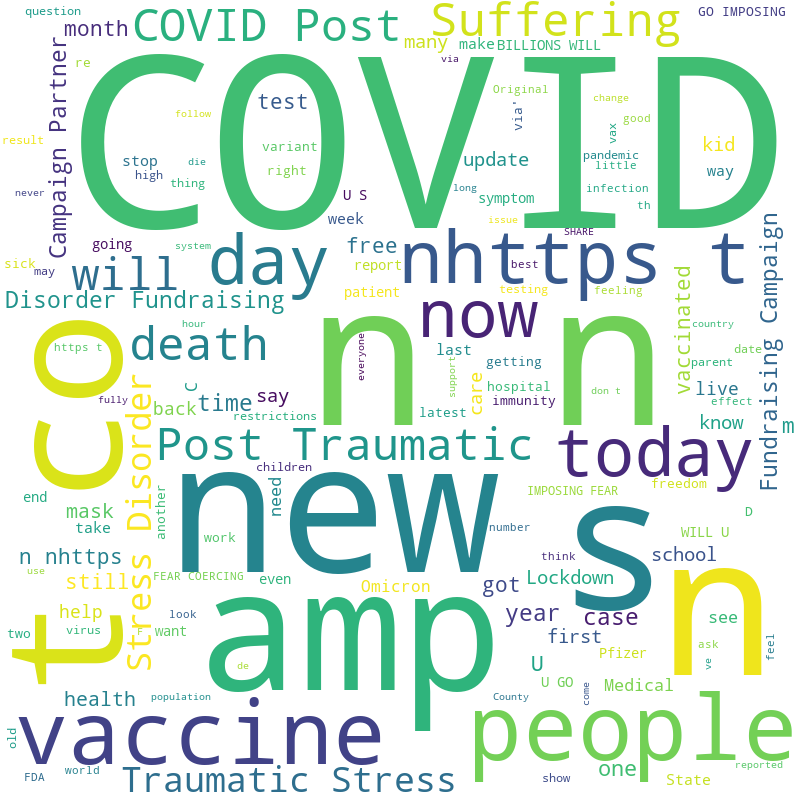

In [16]:
create_wordcloud(df_usa["cleaned_tweet"].values, "USA")

Word Cloud Saved Successfully


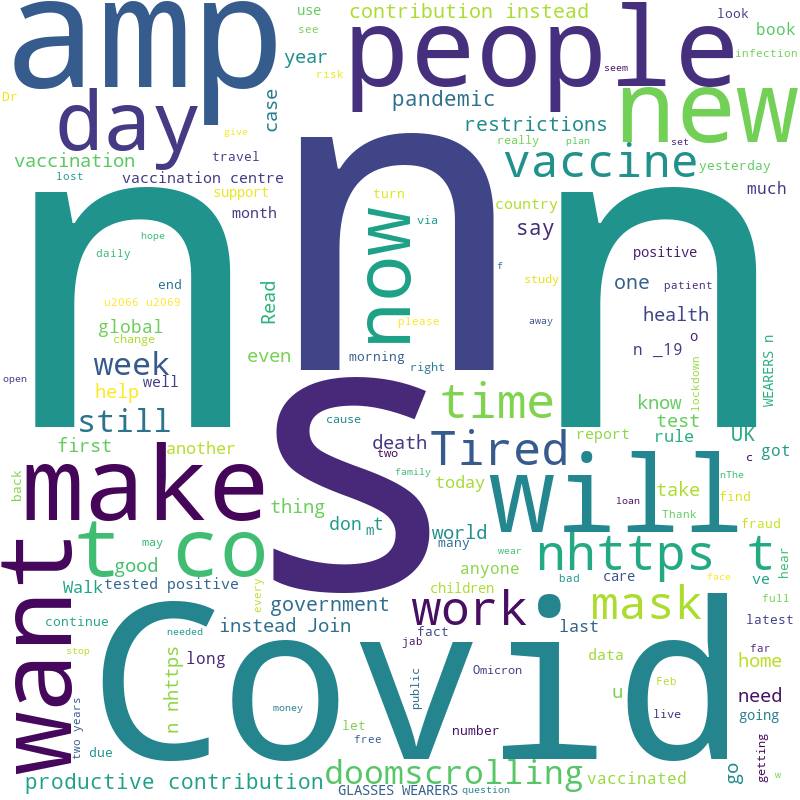

In [17]:
create_wordcloud(df_uk["cleaned_tweet"].values, "UK")

Word Cloud Saved Successfully


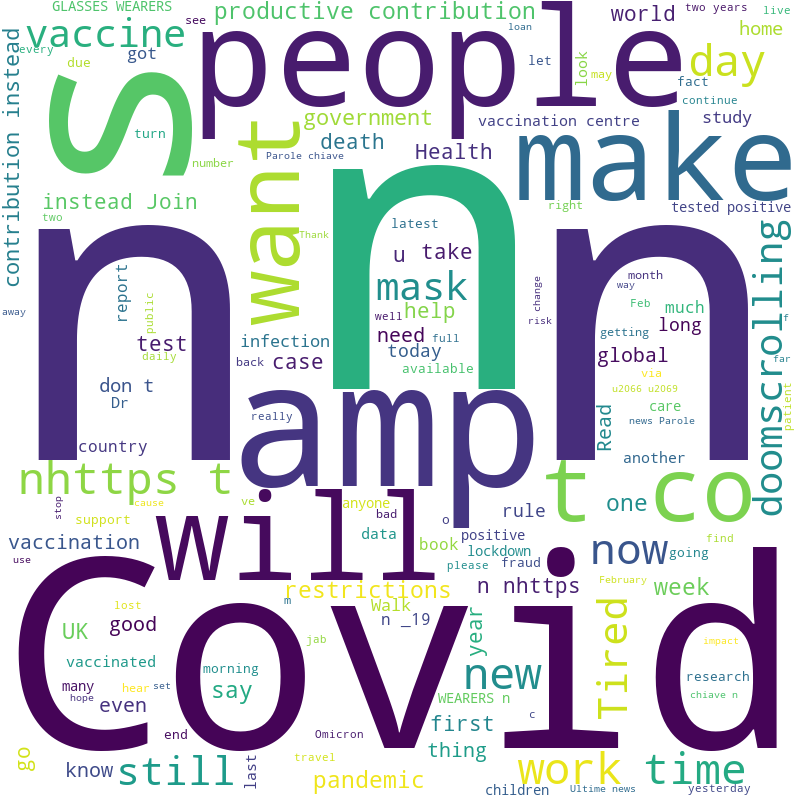

In [18]:
create_wordcloud(df_germany["cleaned_tweet"].values, "Germany")

In [19]:
#export dataframes as csv files again as they are needed for the bokeh app
df_usa.to_csv("../cleaned_data/usa_for_bokeh.csv")
df_uk.to_csv("../cleaned_data/uk_for_bokeh.csv")
df_germany.to_csv("../cleaned_data/germany_for_bokeh.csv")